In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read data from csv file
dataframe = pd.read_csv('datasets/data.csv')
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [3]:
# Check info about dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [4]:
# Check for NaN values
print('NaN values exists :',dataframe.isnull().values.any())
print(dataframe.isnull().sum().sum(), 'NaN values')

NaN values exists : True
5 NaN values


In [5]:
# Drop 5 rows with NaN values
dataframe.dropna(inplace=True)
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


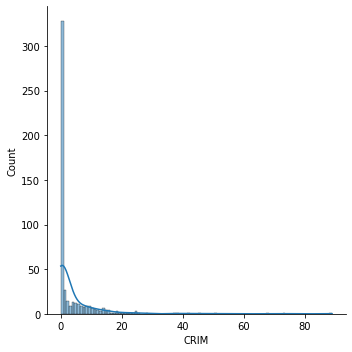

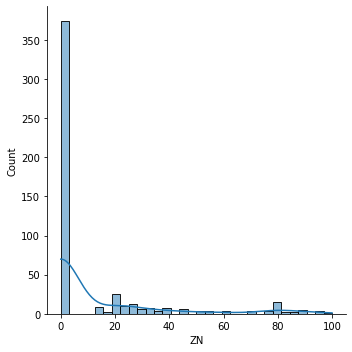

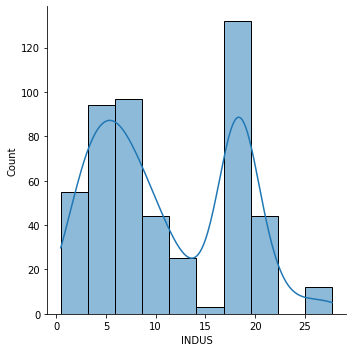

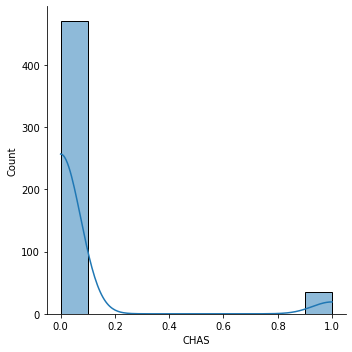

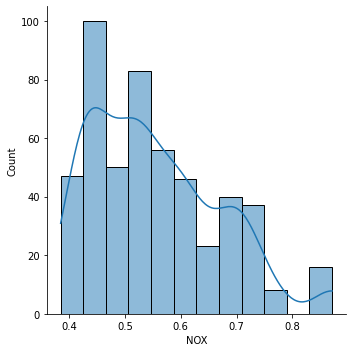

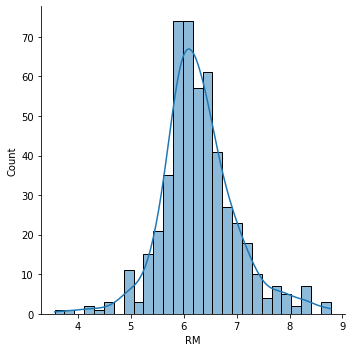

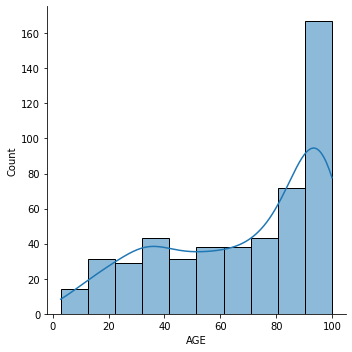

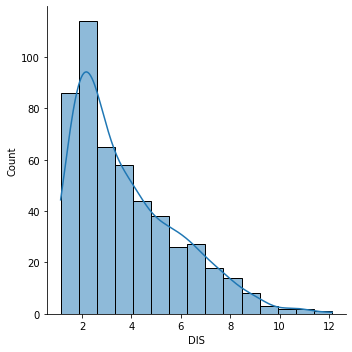

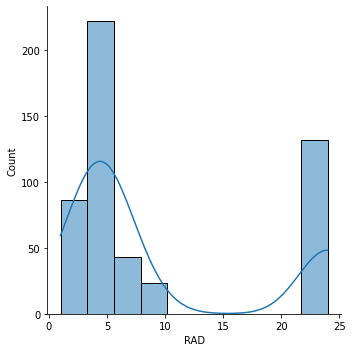

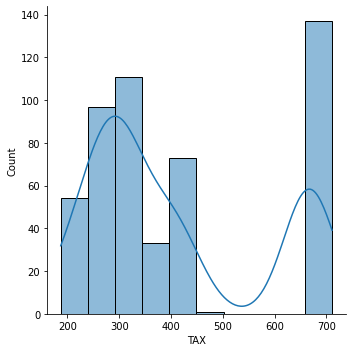

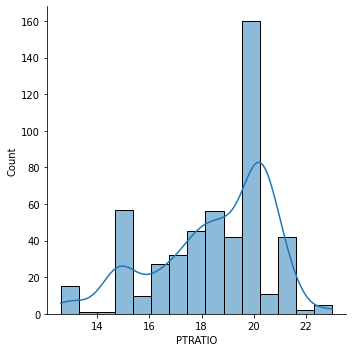

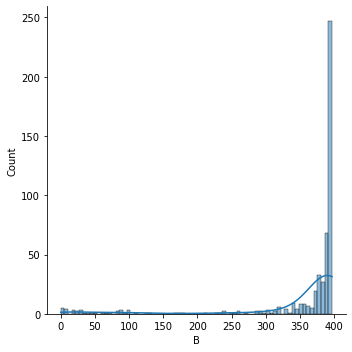

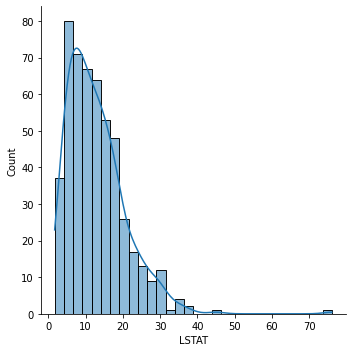

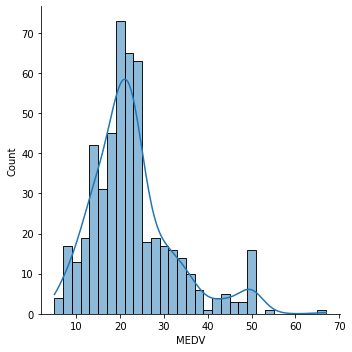

In [6]:
for column in dataframe.columns:
    sns.displot(dataframe[column], kde=True)
    plt.show()

In [7]:
# Normalisation
for column in dataframe.columns[:-1]:
    if dataframe[column].max() > 1 or dataframe[column].min() < 0:
        dataframe[column] = (dataframe[column] - dataframe[column].min()) / (dataframe[column].max() - dataframe[column].min())

In [8]:
# Check the result
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040588,0.112895,0.392773,0.069170,0.555209,0.522435,0.676166,0.240580,0.370940,0.422386,0.567156,0.897444,0.150028,22.711858
std,0.096663,0.233253,0.250168,0.253994,0.115611,0.134854,0.290026,0.190613,0.378985,0.321341,0.211738,0.230101,0.105339,9.520520
min,0.000000,0.000000,0.000000,0.000000,0.385000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000854,0.000000,0.173387,0.000000,0.449000,0.445392,0.433831,0.088107,0.130435,0.177958,0.461538,0.943990,0.070284,17.025000
50%,0.002919,0.000000,0.338343,0.000000,0.538000,0.507377,0.768280,0.181197,0.173913,0.272901,0.625000,0.985778,0.131076,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.624000,0.587996,0.937951,0.362654,1.000000,0.914122,0.730769,0.998260,0.207049,25.075000
max,1.000000,1.000000,1.000000,1.000000,0.871000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000


In [9]:
# Look about correlaion values
dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199418,0.406479,-0.056024,0.420170,-0.220363,0.352817,-0.377904,0.625407,0.582884,0.278265,-0.383363,0.406266,-0.381994
ZN,-0.199418,1.000000,-0.536888,-0.041824,-0.517737,0.307812,-0.567952,0.666410,-0.309652,-0.312901,-0.394101,0.176625,-0.390730,0.339327
INDUS,0.406479,-0.536888,1.000000,0.061746,0.762864,-0.392193,0.644182,-0.709589,0.594344,0.718784,0.378739,-0.357787,0.558093,-0.466094
CHAS,-0.056024,-0.041824,0.061746,1.000000,0.090200,0.089952,0.086664,-0.097049,-0.006803,-0.035770,-0.124780,0.050143,-0.056881,0.164175
NOX,0.420170,-0.517737,0.762864,0.090200,1.000000,-0.301778,0.730640,-0.770167,0.609839,0.665914,0.185864,-0.379523,0.540542,-0.412974
RM,-0.220363,0.307812,-0.392193,0.089952,-0.301778,1.000000,-0.237335,0.199853,-0.213078,-0.293969,-0.339755,0.127888,-0.553126,0.667695
AGE,0.352817,-0.567952,0.644182,0.086664,0.730640,-0.237335,1.000000,-0.748698,0.456212,0.505186,0.261170,-0.273739,0.528674,-0.366717
DIS,-0.377904,0.666410,-0.709589,-0.097049,-0.770167,0.199853,-0.748698,1.000000,-0.491789,-0.530665,-0.237141,0.291309,-0.470697,0.235206
RAD,0.625407,-0.309652,0.594344,-0.006803,0.609839,-0.213078,0.456212,-0.491789,1.000000,0.910898,0.441336,-0.441338,0.424516,-0.382068
TAX,0.582884,-0.312901,0.718784,-0.035770,0.665914,-0.293969,0.505186,-0.530665,0.910898,1.000000,0.442510,-0.439917,0.483227,-0.461959


In [10]:
from sklearn.linear_model import LinearRegression 

In [11]:
# Create train and test datasets
x = dataframe[dataframe.columns[:-1]].values
y = dataframe[dataframe.columns[-1]].values

x_train = x[:406].copy()
x_test = x[406:].copy()

y_train = y[:406].copy()
y_test = y[406:].copy()

In [12]:
# Create and fit the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
# Test Model
abs(model.score(x_test, y_test))

0.9309617207013348